In [2]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

C:\Users\Duvitha\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images=training_images/255.0
testing_images=testing_images/255.0

In [4]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


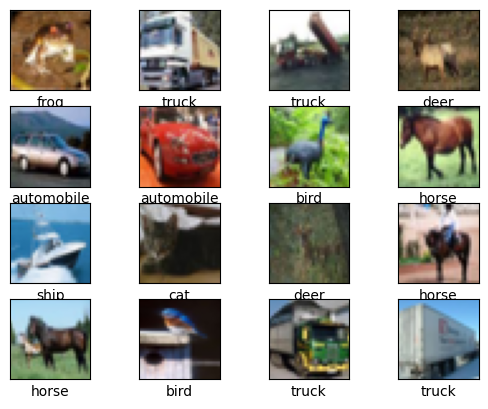

In [5]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [7]:
training_images=training_images[:20000]
training_labels=training_labels[:20000]
testing_images=testing_images[:20000]
testing_labels=testing_labels[:20000]

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten()) 
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=10,validation_data=(testing_images,testing_labels))

Epoch 1/10
625/625 [==============================] - 18s 25ms/step - loss: 1.7351 - accuracy: 0.3586 - val_loss: 1.4567 - val_accuracy: 0.4721
Epoch 2/10
625/625 [==============================] - 16s 26ms/step - loss: 1.3620 - accuracy: 0.5138 - val_loss: 1.2639 - val_accuracy: 0.5485
Epoch 3/10
625/625 [==============================] - 16s 26ms/step - loss: 1.2013 - accuracy: 0.5727 - val_loss: 1.1613 - val_accuracy: 0.5817
Epoch 4/10
625/625 [==============================] - 17s 27ms/step - loss: 1.0948 - accuracy: 0.6145 - val_loss: 1.1426 - val_accuracy: 0.5991
Epoch 5/10
625/625 [==============================] - 16s 25ms/step - loss: 1.0099 - accuracy: 0.6460 - val_loss: 1.0671 - val_accuracy: 0.6250
Epoch 6/10
625/625 [==============================] - 16s 26ms/step - loss: 0.9347 - accuracy: 0.6719 - val_loss: 1.0382 - val_accuracy: 0.6370
Epoch 7/10
625/625 [==============================] - 17s 28ms/step - loss: 0.8775 - accuracy: 0.6884 - val_loss: 1.0643 - val_accuracy:

To evaluate the accuracy of the model

In [8]:
loss,accuracy=model.evaluate(testing_images,testing_labels)
print("Loss:", loss)
print("Accuracy:", accuracy)
model.save('image_classification_model')

313/313 [==============================] - 2s 8ms/step - loss: 1.0403 - accuracy: 0.6568
Loss: 1.040303349494934
Accuracy: 0.6567999720573425
INFO:tensorflow:Assets written to: image_classification_model\assets


INFO:tensorflow:Assets written to: image_classification_model\assets


1/1 [==============================] - 0s 38ms/step
Predicted class: dog


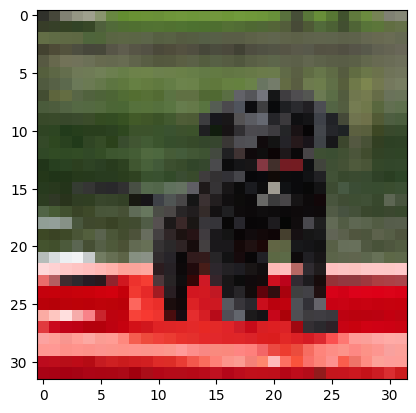

In [17]:
img=cv.imread('dog3.jpg')
img=cv.resize(img,(32,32))
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)
prediction=model.predict(np.array([img/255.0]))
index=np.argmax(prediction)
print("Predicted class:", class_names[index])

1/1 [==============================] - 0s 30ms/step
Predicted class: horse


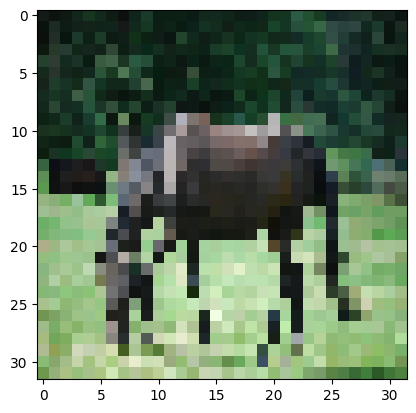

In [10]:
img=cv.imread('horse.jpg')
img=cv.resize(img,(32,32))
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)
prediction=model.predict(np.array([img/255.0]))
index=np.argmax(prediction)
print("Predicted class:", class_names[index])

1/1 [==============================] - 0s 29ms/step
Predicted class: truck


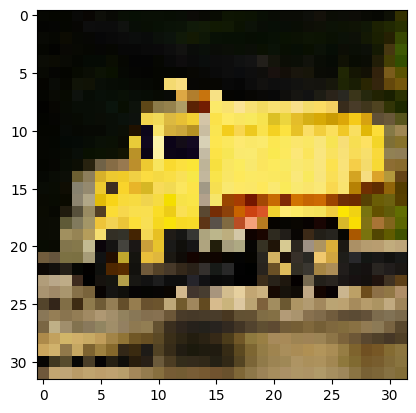

In [11]:
img=cv.imread('Truck.jpg')
img=cv.resize(img,(32,32))
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)
prediction=model.predict(np.array([img/255.0]))
index=np.argmax(prediction)
print("Predicted class:", class_names[index])

1/1 [==============================] - 0s 31ms/step
Predicted class: automobile


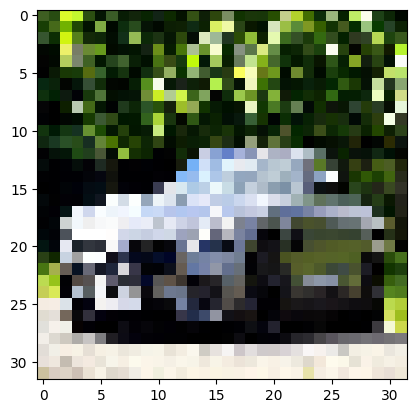

In [12]:
img=cv.imread('car2.jpg')
img=cv.resize(img,(32,32))
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap=plt.cm.binary)
prediction=model.predict(np.array([img/255.0]))
index=np.argmax(prediction)
print("Predicted class:", class_names[index])